# The classification problem

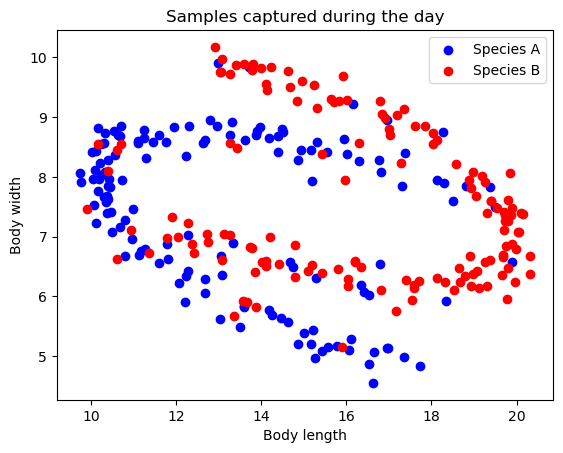

In [30]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

n_samples_per_class = 200

rotation_matrix = np.array([[np.cos(np.pi / 4), -np.sin(np.pi / 4)], 
              [np.sin(np.pi / 4), np.cos(np.pi / 4)]])

X2d = np.vstack([
  np.column_stack([np.cos(np.linspace(0, 1.25 * np.pi, n_samples_per_class)), 2 * np.sin(np.linspace(0, 1.25 * np.pi, n_samples_per_class))]),
  np.column_stack([0.5 - np.cos(np.linspace(0, 1.25 * np.pi, n_samples_per_class)), 2 * (0.5 - np.sin(np.linspace(0, 1.25 * np.pi, n_samples_per_class)))])
])

np.random.seed(0)

X2d = X2d @ rotation_matrix.T

X2d[:, 0] = 10 + (X2d[:, 0] - X2d[:, 0].min()) / (X2d[:, 0].max() - X2d[:, 0].min()) * (20 - 10) + np.random.normal(0, 0.2, X2d[:, 0].shape)
X2d[:, 1] = 5 + (X2d[:, 1] - X2d[:, 1].min()) / (X2d[:, 1].max() - X2d[:, 1].min()) * (10 - 5) + np.random.normal(0, 0.2, X2d[:, 1].shape)

y2d = np.hstack([np.zeros(n_samples_per_class), np.ones(n_samples_per_class)])

X2d_train, X2d_test, y2d_train, y2d_test = train_test_split(X2d, y2d, test_size=0.3, random_state=0)

mislabeled_indices = np.random.choice(len(y2d_train), size=int(0.2 * n_samples_per_class), replace=False)
y2d_train[mislabeled_indices] = 1 - y2d_train[mislabeled_indices]

import matplotlib.pyplot as plt

plt.scatter(X2d_train[y2d_train == 0, 0], X2d_train[y2d_train == 0, 1], label='Species A', color='blue')
plt.scatter(X2d_train[y2d_train == 1, 0], X2d_train[y2d_train == 1, 1], label='Species B', color='red')
plt.legend()
plt.title('Samples captured during the day')
plt.xlabel('Body length')
plt.ylabel('Body width')
plt.savefig('../results/2dday.png')
plt.show()

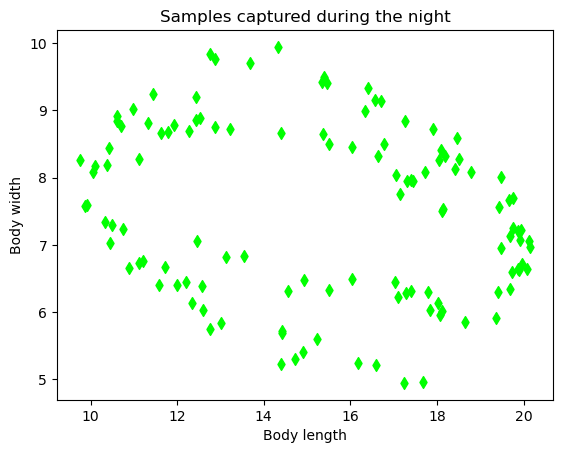

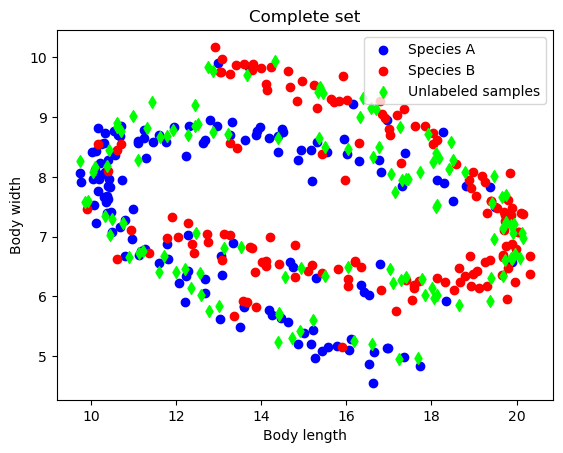

In [31]:
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], c='lime', marker='d')
plt.title('Samples captured during the night')
plt.xlabel('Body length')
plt.ylabel('Body width')
plt.savefig('../results/2dnight.png')
plt.show()

plt.scatter(X2d_train[y2d_train == 0, 0], X2d_train[y2d_train == 0, 1], label='Species A', color='blue')
plt.scatter(X2d_train[y2d_train == 1, 0], X2d_train[y2d_train == 1, 1], label='Species B', color='red')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], marker='d', label='Unlabeled samples', color='lime')
plt.legend()
plt.title('Complete set')
plt.xlabel('Body length')
plt.ylabel('Body width')
plt.savefig('../results/2dtraintest.png')
plt.show()

# Visual prediction

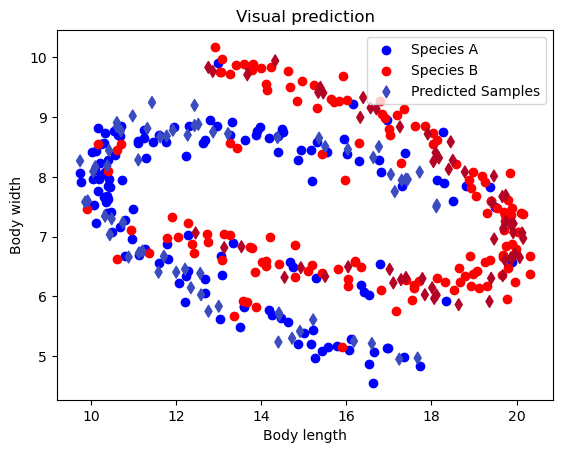

In [32]:
plt.scatter(X2d_train[y2d_train == 0, 0], X2d_train[y2d_train == 0, 1], label='Species A', color='blue')
plt.scatter(X2d_train[y2d_train == 1, 0], X2d_train[y2d_train == 1, 1], label='Species B', color='red')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], c=y2d_test, cmap='coolwarm', marker='d', label='Predicted Samples')
plt.legend()
plt.title('Visual prediction')
plt.xlabel('Body length')
plt.ylabel('Body width')
plt.savefig('../results/2dpredvisual.png')
plt.show()

# Higher dimensions

In [33]:
X4d, y4d = make_classification(n_samples=10, n_features=4, n_classes=2, n_informative=4, n_redundant=0, random_state=0)

middle_index = len(X4d) // 2
X4d_test, y4d_test = X4d[middle_index], y4d[middle_index]
X4d_train, y4d_train = np.delete(X4d, middle_index, axis=0), np.delete(y4d, middle_index, axis=0)

import pandas as pd

df_train = pd.DataFrame(X4d_train, columns=['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3'])
df_train['Label'] = y4d_train
df_train.insert(0, 'Sample', [i for i in range(len(df_train))])
df_train = df_train.round(2)
print(df_train)

print()

df_test = pd.DataFrame(X4d_test.reshape(1, -1), columns=['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3'])
df_test['Label'] = '?'
df_test = df_test.round(2)
print(df_test)

df_train.to_csv('../results/4dtrain.csv', index=False)
df_test.to_csv('../results/4dtest.csv', index=False)

   Sample  Feature 0  Feature 1  Feature 2  Feature 3  Label
0       0      -1.12       0.43      -1.50       0.55      1
1       1       1.93      -1.71      -0.75      -1.15      0
2       2       1.70       1.63       1.44      -0.42      1
3       3      -2.45       0.64      -0.48       0.17      1
4       4       1.14      -0.56       0.46      -1.04      1
5       5      -1.29      -1.58      -0.04      -2.11      0
6       6      -1.56      -1.13      -1.08       0.70      0
7       7       2.02      -0.14      -1.25      -1.96      1
8       8       1.37       0.01      -3.05       1.66      0

   Feature 0  Feature 1  Feature 2  Feature 3 Label
0      -0.72      -0.41       1.21      -2.49     ?


# Compute distance

\begin{equation}
d = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
\end{equation}

In [ ]:
df_train['Distance'] = np.linalg.norm(df_train.iloc[:, :4].values - X4d_test, axis=1)
df_train = df_train.round(2)
print(df_train)
df_train.to_csv('../results/4dtraindist.csv', index=False)

In [ ]:
df_train['Rank'] = df_train['Distance'].rank(method='first').astype(int)
df_train = df_train.round(2)
print(df_train)
df_train.to_csv('../results/4dtrainsorted.csv', index=False)

   Sample  Feature 0  Feature 1  Feature 2  Feature 3  Label  Distance  Rank
0       0       1.93      -1.71      -0.75      -1.15      0      2.29     1
1       1       1.70       1.63       1.44      -0.42      1      4.08     2
2       2      -2.45       0.64      -0.48       0.17      1      4.87     4
3       3       1.14      -0.56       0.46      -1.04      1      4.29     3
4       4      -0.72      -0.41       1.21      -2.49      0      5.40     5
5       5      -1.29      -1.58      -0.04      -2.11      0      6.39     6
6       6      -1.56      -1.13      -1.08       0.70      0      7.58     7
7       7       2.02      -0.14      -1.25      -1.96      1      8.58     8
8       8       1.37       0.01      -3.05       1.66      0      9.97     9


In [ ]:
df_test['Label'] = df_train.loc[df_train['Rank'] == 1, 'Label'].values[0]
df_test = df_test.round(2)
print(df_test)
df_test.to_csv('../results/4dpred.csv', index=False)

   Feature 0  Feature 1  Feature 2  Feature 3  Label
0      -1.12       0.43       -1.5       0.55      0


# Visualize Nearest neighbor

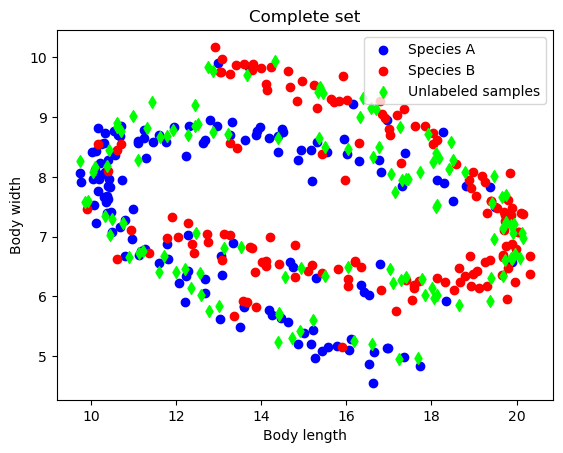

In [ ]:
plt.scatter(X2d_train[y2d_train == 0, 0], X2d_train[y2d_train == 0, 1], label='Species A', color='blue')
plt.scatter(X2d_train[y2d_train == 1, 0], X2d_train[y2d_train == 1, 1], label='Species B', color='red')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], marker='d', label='Unlabeled samples', color='lime')
plt.legend()
plt.title('Complete set')
plt.xlabel('Body length')
plt.ylabel('Body width')
plt.show()

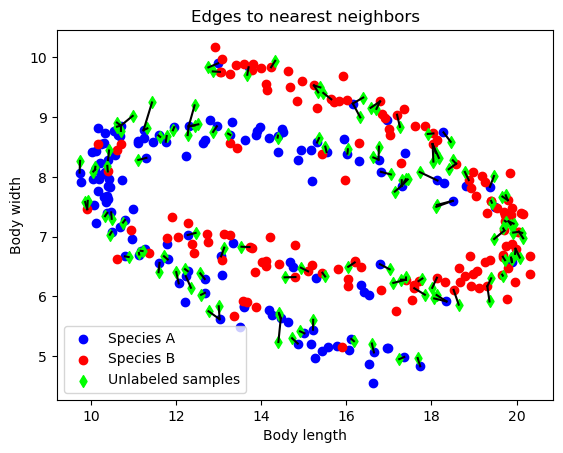

In [ ]:
distances = np.linalg.norm(X2d_test[:, np.newaxis] - X2d_train, axis=2)

nearest_indices = np.argmin(distances, axis=1)

plt.scatter(X2d_train[y2d_train == 0, 0], X2d_train[y2d_train == 0, 1], label='Species A', color='blue')
plt.scatter(X2d_train[y2d_train == 1, 0], X2d_train[y2d_train == 1, 1], label='Species B', color='red')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], marker='d', label='Unlabeled samples', color='lime')

for idx in range(len(X2d_test)):
  test_sample = X2d_test[idx]
  nearest_train_sample = X2d_train[nearest_indices[idx]]
  plt.plot([test_sample[0], nearest_train_sample[0]], [test_sample[1], nearest_train_sample[1]], 'k')

plt.legend()
plt.title('Edges to nearest neighbors')
plt.xlabel('Body length')
plt.ylabel('Body width')
plt.savefig('../results/2dedges.png')
plt.show()

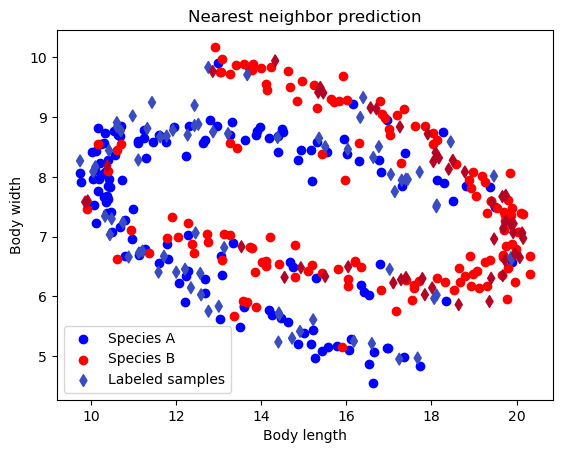

In [ ]:
distances = np.linalg.norm(X2d_test[:, np.newaxis] - X2d_train, axis=2)

nearest_indices = np.argmin(distances, axis=1)

y2d_pred_nn = y2d_train[nearest_indices]

plt.scatter(X2d_train[y2d_train == 0, 0], X2d_train[y2d_train == 0, 1], label='Species A', color='blue')
plt.scatter(X2d_train[y2d_train == 1, 0], X2d_train[y2d_train == 1, 1], label='Species B', color='red')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], marker='d', label='Labeled samples', c=y2d_pred_nn, cmap='coolwarm')
plt.legend()
plt.title('Nearest neighbor prediction')
plt.xlabel('Body length')
plt.ylabel('Body width')
plt.savefig('../results/2dprednn.png')
plt.show()

# Decision boundary

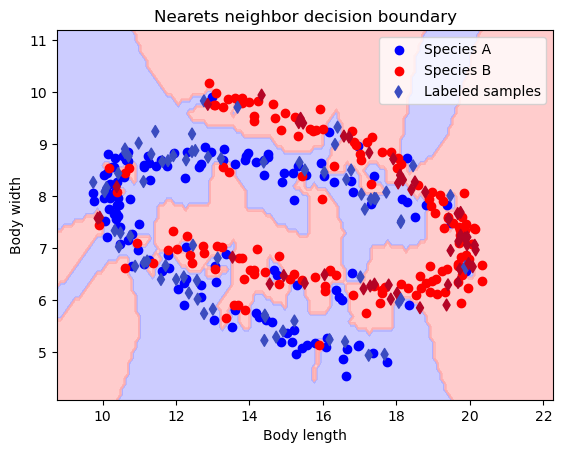

In [ ]:
from matplotlib.colors import ListedColormap

x_min, x_max = 0.9 * X2d[:, 0].min(), 1.1 * X2d[:, 0].max()
y_min, y_max = 0.9 * X2d[:, 1].min(), 1.1 * X2d[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
           np.arange(y_min, y_max, 0.1))

grid_points = np.c_[xx.ravel(), yy.ravel()]
distances = np.linalg.norm(grid_points[:, np.newaxis] - X2d_train, axis=2)

nearest_indices = np.argmin(distances, axis=1)
grid_predictions_nn = y2d_train[nearest_indices].reshape(xx.shape)

plt.contourf(xx, yy, grid_predictions_nn, alpha=0.6, cmap=ListedColormap(['#AAAAFF', '#FFAAAA']))

plt.scatter(X2d_train[y2d_train == 0, 0], X2d_train[y2d_train == 0, 1], label='Species A', color='blue')
plt.scatter(X2d_train[y2d_train == 1, 0], X2d_train[y2d_train == 1, 1], label='Species B', color='red')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], marker='d', label='Labeled samples', c=y2d_pred_nn, cmap='coolwarm')

plt.legend()
plt.title('Nearets neighbor decision boundary')
plt.xlabel('Body length')
plt.ylabel('Body width')
plt.savefig('../results/dbnn.png')
plt.show()

# k-Nearest neighbors

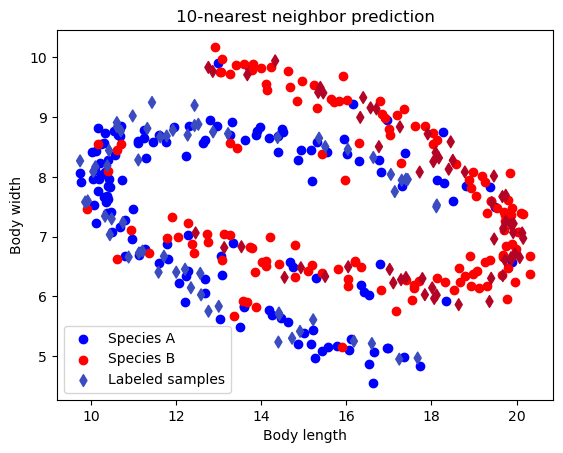

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X2d_train, y2d_train)
y2d_pred_knn = knn.predict(X2d_test)

plt.scatter(X2d_train[y2d_train == 0, 0], X2d_train[y2d_train == 0, 1], label='Species A', color='blue')
plt.scatter(X2d_train[y2d_train == 1, 0], X2d_train[y2d_train == 1, 1], label='Species B', color='red')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], marker='d', label='Labeled samples', c=y2d_pred_knn, cmap='coolwarm')

plt.legend()
plt.title('10-nearest neighbor prediction')
plt.xlabel('Body length')
plt.ylabel('Body width')
plt.savefig('../results/2dpredknn.png')
plt.show()

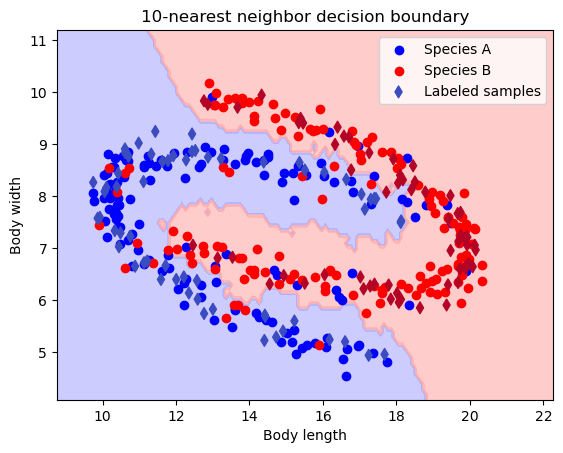

In [ ]:
grid_predictions_knn = knn.predict(grid_points).reshape(xx.shape)

plt.contourf(xx, yy, grid_predictions_knn, alpha=0.6, cmap=ListedColormap(['#AAAAFF', '#FFAAAA']))

plt.scatter(X2d_train[y2d_train == 0, 0], X2d_train[y2d_train == 0, 1], label='Species A', color='blue')
plt.scatter(X2d_train[y2d_train == 1, 0], X2d_train[y2d_train == 1, 1], label='Species B', color='red')
plt.scatter(X2d_test[:, 0], X2d_test[:, 1], marker='d', label='Labeled samples', c=y2d_pred_knn, cmap='coolwarm')

plt.legend()
plt.title('10-nearest neighbor decision boundary')
plt.xlabel('Body length')
plt.ylabel('Body width')
plt.savefig('../results/dbknn.png')
plt.show()

# Real data

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

url = (
  "https://raw.githubusercontent.com/jbrownlee/Datasets/"
  "master/pima-indians-diabetes.data.csv"
)
cols = [
  "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
  "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv(url, header=None, names=cols)

features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for feat in features:
  df[feat] = df[feat].replace(0, np.nan)
  df[feat] = df[feat].fillna(df[feat].median())

X2d = df.drop("Outcome", axis=1).values
y2d = df["Outcome"].values
label_map = {0: "Non-Diabetic", 1: "Diabetic"}
y2d = np.vectorize(label_map.get)(y2d).reshape(-1, 1)

scaler = StandardScaler()
X2d = scaler.fit_transform(X2d)

print("Pima Indians Diabetes Dataset:")
print(f"Number of features: {len(features)}")
print(f"Number of samples: {len(df)}")
print(f"Number of classes: {df['Outcome'].nunique()}")

nn = KNeighborsClassifier(n_neighbors=1)
scores_nn = cross_val_score(nn, X2d, y2d.ravel(), cv=10)
accuracy_nn = scores_nn.mean()
std_nn = scores_nn.std()

k = 3

knn = KNeighborsClassifier(n_neighbors=k)
scores_knn = cross_val_score(knn, X2d, y2d.ravel(), cv=10)
accuracy_knn = scores_knn.mean()
std_knn = scores_knn.std()

print()
print("Cross-Validation Results:")
print(f"k=1: Accuracy = {accuracy_nn:.2f}, Std Dev = {std_nn:.2f}")
print(f"k={k}: Accuracy = {accuracy_knn:.2f}, Std Dev = {std_knn:.2f}")

dataset_metadata_df = pd.DataFrame({
  "Dataset": ["Pima Indians Diabetes"],
  "Features": [len(features)],
  "Samples": [len(df)],
  "Classes": [df["Outcome"].nunique()]
})
dataset_metadata_df.to_csv('../results/datasetmetadata.csv', index=False)

cross_val_results_df = pd.DataFrame({
  "k": [1, k],
  "Accuracy": [accuracy_nn, accuracy_knn],
  "Standard Deviation": [std_nn, std_knn]
}).round(2)
cross_val_results_df.to_csv('../results/crossvalresults.csv', index=False)

Pima Indians Diabetes Dataset:
Number of features: 5
Number of samples: 768
Number of classes: 2

Cross-Validation Results:
k=1: Accuracy = 0.67, Std Dev = 0.05
k=3: Accuracy = 0.74, Std Dev = 0.04


# Thank you!